In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## EDA

In [31]:
test_df = pd.read_csv("data/test.csv", delimiter=";")
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<IPython.core.display.Javascript object>

In [32]:
train_dt = pd.read_csv("data/train.csv", delimiter=";")
train_dt.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<IPython.core.display.Javascript object>

In [35]:
# concatinate train and test data to exploratory all data in full picture.
full_df = pd.concat([train_dt, test_df])

<IPython.core.display.Javascript object>

In [37]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


<IPython.core.display.Javascript object>

> This dataset contains of **49732 record** and **17 feature**, and there are **no null values**.

In [38]:
full_df.sort_values(["age", "duration"], ascending=True).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42954,18,student,single,unknown,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
41222,18,student,single,unknown,no,35,no,no,telephone,21,aug,104,2,-1,0,unknown,no
40736,18,student,single,primary,no,1944,no,no,telephone,10,aug,122,3,-1,0,unknown,no
41273,18,student,single,unknown,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
41252,18,student,single,secondary,no,5,no,no,cellular,24,aug,143,2,-1,0,unknown,no


<IPython.core.display.Javascript object>

In [39]:
full_df[full_df["age"] >= 60]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18,60,retired,married,primary,no,60,yes,no,unknown,5,may,219,1,-1,0,unknown,no
32,60,admin.,married,secondary,no,39,yes,yes,unknown,5,may,208,1,-1,0,unknown,no
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
66,60,retired,married,tertiary,no,100,no,no,unknown,5,may,528,1,-1,0,unknown,no
92,60,admin.,married,secondary,no,290,yes,no,unknown,5,may,583,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4364,63,retired,divorced,secondary,no,1490,no,no,cellular,8,jun,506,1,-1,0,unknown,yes
4388,83,retired,divorced,primary,no,1097,no,no,telephone,5,mar,181,1,-1,0,unknown,yes
4413,65,retired,married,primary,no,493,no,no,cellular,16,oct,622,1,182,1,failure,no
4466,61,management,married,secondary,no,967,no,no,cellular,20,aug,180,1,-1,0,unknown,no


<IPython.core.display.Javascript object>

In [40]:
full_df.groupby("education")["y"].value_counts()

education  y  
primary    no      6874
           yes      655
secondary  no     22813
           yes     2695
tertiary   no     12462
           yes     2189
unknown    no      1773
           yes      271
Name: y, dtype: int64

<IPython.core.display.Javascript object>

In [41]:
full_df.groupby("marital")["y"].value_counts()

marital   y  
divorced  no      5036
          yes      699
married   no     26979
          yes     3032
single    no     11907
          yes     2079
Name: y, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
full_df.job.value_counts()

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

<IPython.core.display.Javascript object>

In [43]:
full_df.education.value_counts()

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

<IPython.core.display.Javascript object>

In [44]:
full_df.loan.value_counts()

no     41797
yes     7935
Name: loan, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
full_df.marital.value_counts()

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

<IPython.core.display.Javascript object>

### convert categrical features

In [46]:
cat_list = train_dt.select_dtypes(include=["object"]).columns.tolist()
cat_list = cat_list[0:9]
cat_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

<IPython.core.display.Javascript object>

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


def convert_categorical_features(data_frame, cat_list):
    for item in cat_list:
        result_of_lableling = le.fit_transform(data_frame[str(item)])
        data_frame[str(item)] = result_of_lableling

<IPython.core.display.Javascript object>

In [48]:
convert_categorical_features(train_dt, cat_list)

<IPython.core.display.Javascript object>

In [49]:
train_dt

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no


<IPython.core.display.Javascript object>

In [50]:
convert_categorical_features(test_df, cat_list)

<IPython.core.display.Javascript object>

In [51]:
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,no
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,no
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,no
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,no
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,no
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,no
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,no
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,no


<IPython.core.display.Javascript object>

## Data Visulization

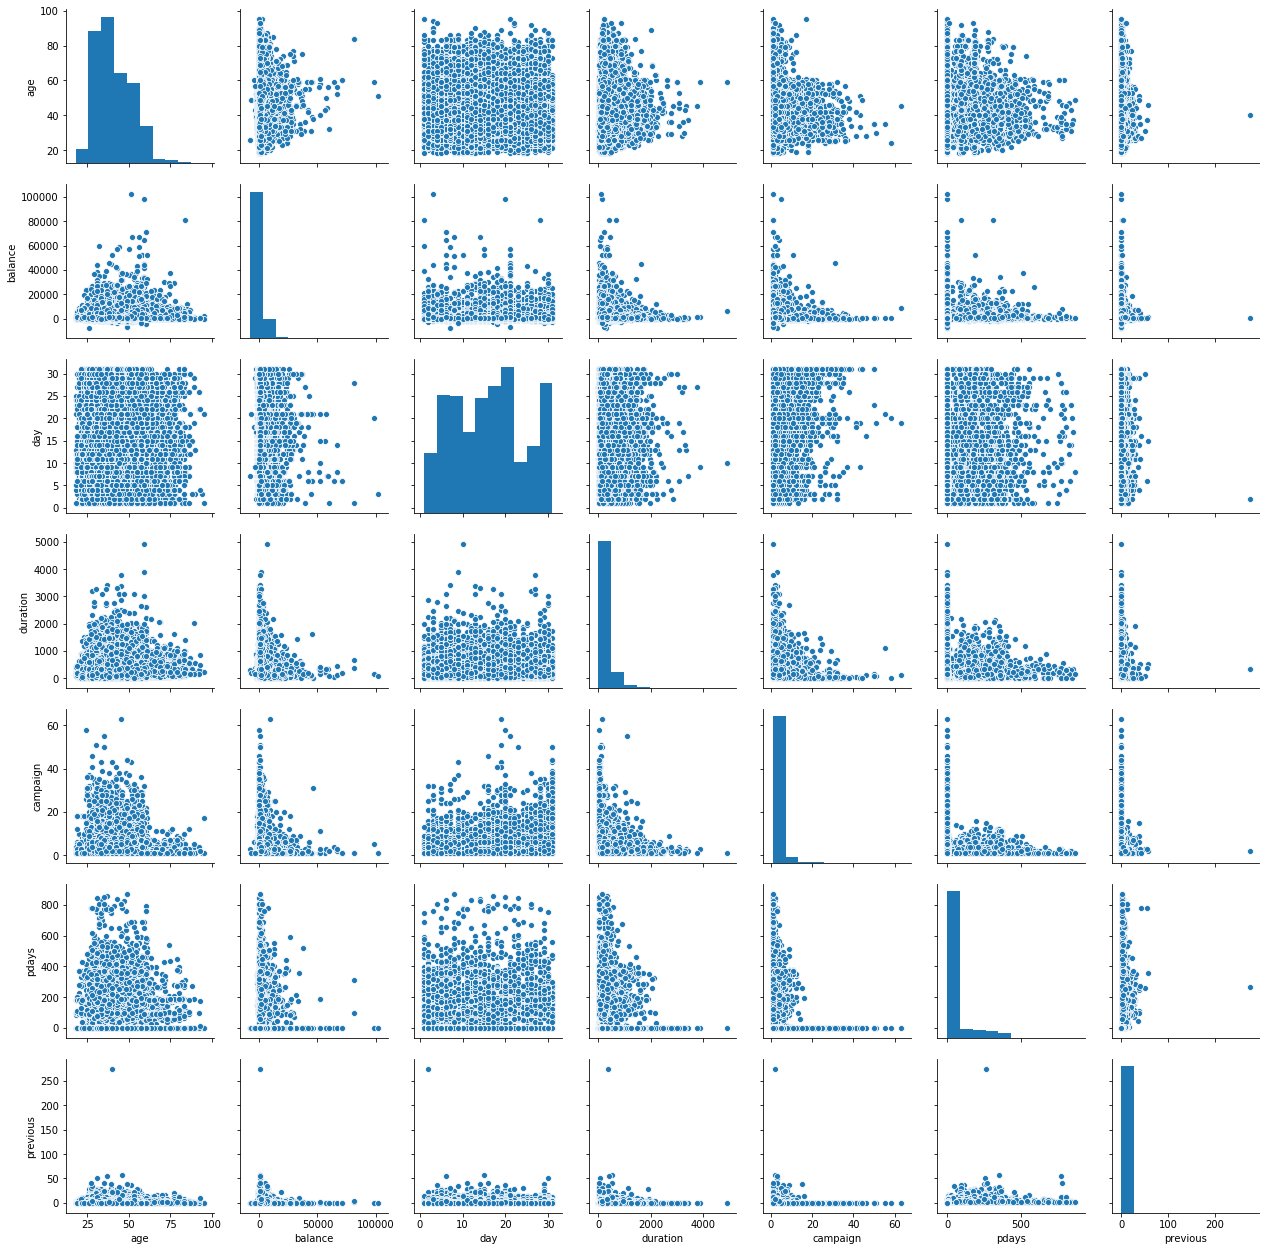

<IPython.core.display.Javascript object>

In [52]:
sns.pairplot(full_df)

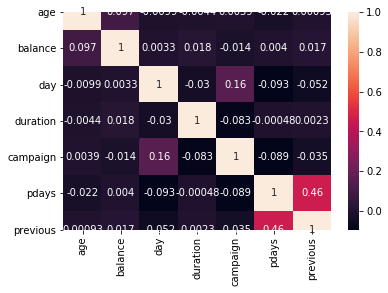

<IPython.core.display.Javascript object>

In [53]:
sns.heatmap(full_df.corr(), annot=True)

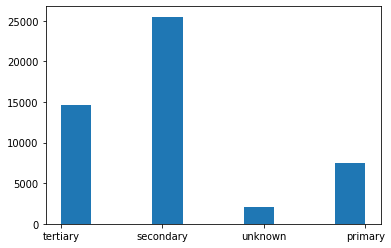

<IPython.core.display.Javascript object>

In [54]:
plt.hist(full_df.education)
plt.show()

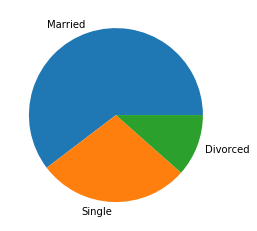

<IPython.core.display.Javascript object>

In [55]:
plt.pie(
    full_df.marital.value_counts(),
    labels=["Married", "Single", "Divorced"],
)
plt.show()

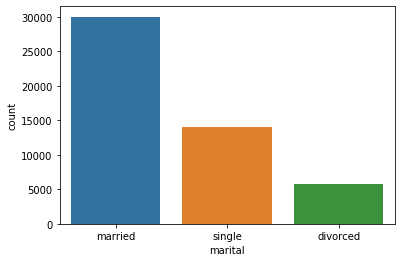

<IPython.core.display.Javascript object>

In [56]:
sns.countplot(
    data=full_df,
    x="marital",
)

## Building model

### Split data to train and test

In [57]:
X_train = train_dt.drop(["y"], axis=1)
y_train = train_dt["y"]

<IPython.core.display.Javascript object>

In [58]:
X_test = train_dt.drop(["y"], axis=1)
y_test = train_dt["y"]

<IPython.core.display.Javascript object>

### Model Training and Predicting

In [59]:
from sklearn.linear_model import LogisticRegression

<IPython.core.display.Javascript object>

In [60]:
model = LogisticRegression(max_iter=400)

<IPython.core.display.Javascript object>

In [61]:
model.fit(
    X_train,
    y_train,
)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<IPython.core.display.Javascript object>

In [62]:
y_pridect = model.predict(X_test)

C:\Users\moham\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


<IPython.core.display.Javascript object>

In [63]:
y_pridect

array(['no', 'no', 'no', ..., 'yes', 'no', 'yes'], dtype=object)

<IPython.core.display.Javascript object>

In [64]:
y_test

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

<IPython.core.display.Javascript object>

In [65]:
# CONVERT series to array we use .values
y_test.values

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

<IPython.core.display.Javascript object>

### Model Evaluation

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

<IPython.core.display.Javascript object>

In [67]:
print(confusion_matrix(y_test, y_pridect))

[[39142   780]
 [ 4157  1132]]


<IPython.core.display.Javascript object>

In [68]:
print(classification_report(y_test, y_pridect))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     39922
         yes       0.59      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



<IPython.core.display.Javascript object>